In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

file_path = '../Data_clean/Testing_data/Locus/'
sensors = ['1.E09', '1.E10', '1.E15', '1.E16', '2.T01', '2.T02', '2.T03', '2.T04' ]


In [12]:
df = pd.read_excel(file_path + sensors[0] + '_processed.xlsx')

In [13]:
df.head

<bound method NDFrame.head of                   Date  Count
0  2024-06-11 11:33:06    1.0
1  2024-06-11 11:38:06   34.0
2  2024-06-11 11:43:06   21.0
3  2024-06-11 11:48:06   10.0
4  2024-06-11 11:53:06   26.0
..                 ...    ...
69 2024-06-11 18:23:33    0.0
70 2024-06-11 18:28:33    0.0
71 2024-06-11 18:33:33    0.0
72 2024-06-11 18:38:33    0.0
73 2024-06-11 22:27:42    NaN

[74 rows x 2 columns]>

In [11]:
dfs = []
import os

for sensor in sensors:

    file_name = os.path.join(file_path, f'{sensor}_processed.xlsx')

    df = pd.read_excel(file_name, parse_dates=['Date'])
 
    df['Sensor'] = sensor

    dfs.append(df)

concatenated_df = pd.concat(dfs, ignore_index=True)

print(concatenated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    593 non-null    datetime64[ns]
 1   Count   573 non-null    float64       
 2   Sensor  593 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.0+ KB
None


In [14]:
concatenated_df['Count'].mean()

10.399650959860384

In [15]:
concatenated_df = concatenated_df[concatenated_df['Count'] != 0]

In [16]:
concatenated_df['Count'].mean()

13.605022831050228

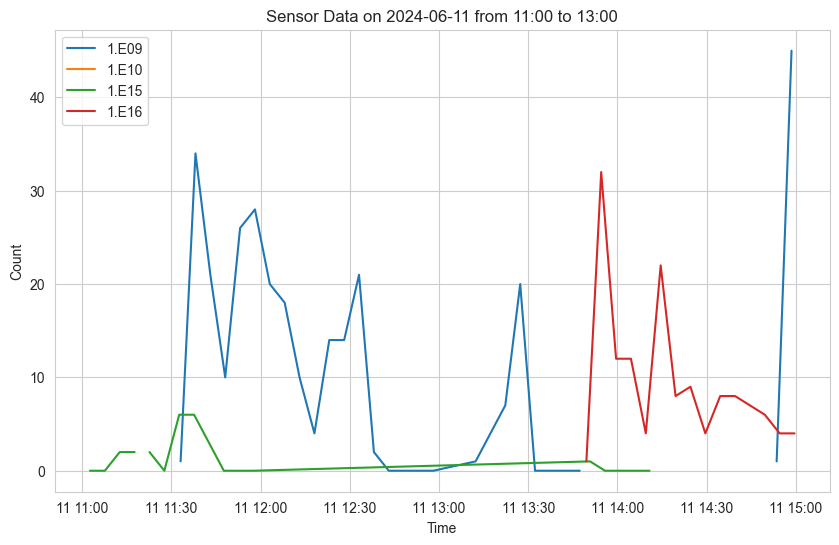

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# List of sensor file names
sensors = ['1.E09', '1.E10', '1.E15', '1.E16']
input_folder = '../Data_clean/Testing_data/Locus/'

# Initialize an empty list to store dataframes for each sensor
dfs = []

# Read and process data for each sensor
for sensor in sensors:
    # Read the data
    df = pd.read_excel(input_folder + f'{sensor}_processed.xlsx')
    
    # Filter the data for the specific date and time range
    df['Date'] = pd.to_datetime(df['Date'])
    start_time = '2024-06-11 11:00:00'
    end_time = '2024-06-11 15:00:00'
    mask = (df['Date'] >= start_time) & (df['Date'] <= end_time)
    df_filtered = df[mask]
    
    # Append the filtered dataframe to the list
    dfs.append(df_filtered)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each sensor's data
for i, df in enumerate(dfs):
    plt.plot(df['Date'], df['Count'], label=sensors[i])

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Sensor Data on 2024-06-11 from 11:00 to 13:00')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
